In [1]:
import pandas as pd
import numpy as np

from datetime import date

In [2]:
df = pd.read_csv("fruitvegprices-2017_2022.csv")

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df.describe()

,price
count,9647.000000
mean,1.528333
std,1.927865
min,0.020000
25%,0.540000
50%,0.880000
75%,1.500000
max,17.600000


{'whiskers': [<matplotlib.lines.Line2D at 0x7eff5b197d90>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff5b1b4430>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff5b197ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7eff5b1b4910>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eff5b1b4be0>],
 'means': []}

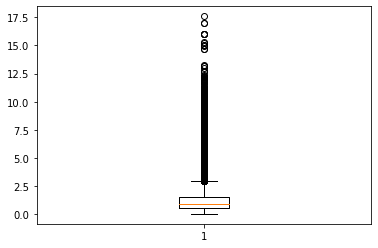

In [5]:
plt.boxplot( df["price"] )

In [6]:
np.median( df["price"] )

0.88

### EDA = Exploratory Data Analysis

In [7]:
df["date"] = pd.to_datetime(df["date"])

In [8]:
df["year"] = df["date"].dt.year

In [9]:
df.loc[ : , ["year"] ].value_counts() / df.shape[0]

year
2018    0.244532
2019    0.235410
2020    0.224422
2021    0.224111
2017    0.038872
2022    0.032653
dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff5a9204c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff5a920a60>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff5a9201f0>],
 'medians': [<matplotlib.lines.Line2D at 0x7eff5a8ae040>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eff5a8ae310>],
 'means': []}

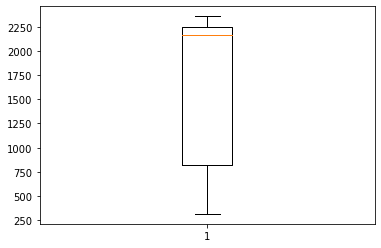

In [10]:
plt.boxplot(  df.loc[ : , ["year"] ].value_counts() )

In [11]:
df.loc[ : , ["category"] ].value_counts() / df.shape[0]

category   
vegetable      0.752980
fruit          0.206489
cut_flowers    0.035451
pot_plants     0.005079
dtype: float64

In [12]:
df = df.loc[ ~df["year"].isin([2017,2022]) , : ]
df = df.loc[ df["category"] != "pot_plants" , : ]

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff5a89f880>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff5a89fd00>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff5a89f5b0>],
 'medians': [<matplotlib.lines.Line2D at 0x7eff5a8302e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eff5a8305b0>],
 'means': []}

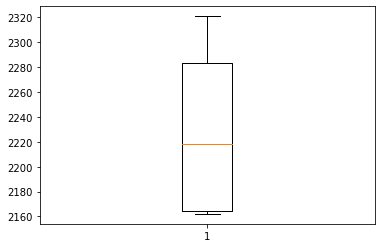

In [13]:
plt.boxplot(  df.loc[ : , ["year"] ].value_counts() )

In [14]:
df.loc[ : , ["year"] ].value_counts()

year
2018    2321
2019    2271
2020    2165
2021    2162
dtype: int64

<AxesSubplot:xlabel='year', ylabel='price'>

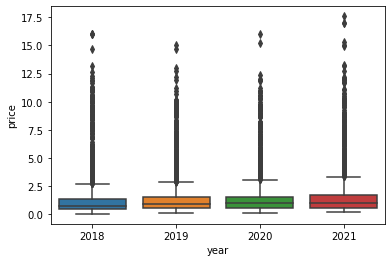

In [15]:
sns.boxplot( data=df  , x="year" , y="price" )

In [16]:
df.loc[ : , ["category"] ].value_counts()

category   
vegetable      6785
fruit          1838
cut_flowers     296
dtype: int64

<AxesSubplot:xlabel='item', ylabel='price'>

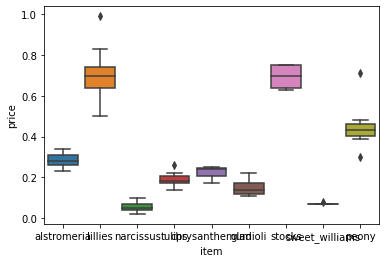

In [17]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2018) , : ]  , x="item" , y="price" )

<AxesSubplot:xlabel='item', ylabel='price'>

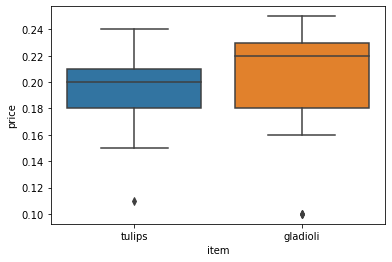

In [18]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2019) , : ]  , x="item" , y="price" )

<AxesSubplot:xlabel='item', ylabel='price'>

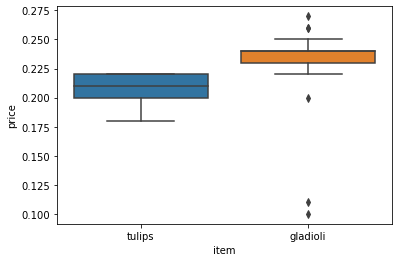

In [19]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2020) , : ]  , x="item" , y="price" )

<AxesSubplot:xlabel='item', ylabel='price'>

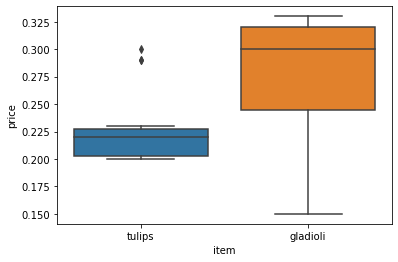

In [20]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2021) , : ]  , x="item" , y="price" )

### Experimento para encontrar valores atipicos

In [21]:
gladioni_2020 = df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2020) & (df['item'] == 'gladioli') , ['price'] ]

{'whiskers': [<matplotlib.lines.Line2D at 0x7eff5a4ba190>,
 'caps': [<matplotlib.lines.Line2D at 0x7eff5a4ba730>,
 'boxes': [<matplotlib.lines.Line2D at 0x7eff5a4ace80>],
 'medians': [<matplotlib.lines.Line2D at 0x7eff5a4bacd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7eff5a4bafa0>],
 'means': []}

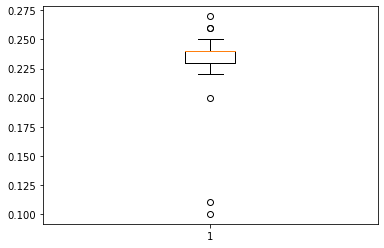

In [22]:
plt.boxplot(gladioni_2020)

In [23]:
q1 = np.quantile( gladioni_2020 , 0.25 )
q3 = np.quantile( gladioni_2020 , 0.75 )

In [24]:
q1

0.23

In [25]:
q3

0.24

In [26]:
np.median( gladioni_2020 )

0.24

In [27]:
np.quantile( gladioni_2020 , 0.5 )

0.24

In [28]:
## Inter quartile range
iqr = q3 - q1

In [29]:
iqr

0.009999999999999981

In [30]:
upper_bound = q3 + (1.5*iqr)
lower_bound = q1 - (1.5*iqr)

In [31]:
upper_bound

0.25499999999999995

In [32]:
lower_bound

0.21500000000000002

In [33]:
gladioni_2020.loc[ (gladioni_2020['price'] > upper_bound) | (gladioni_2020['price'] < lower_bound) , : ]

,price
2701,0.10
2750,0.11
2804,0.20
3037,0.26
3506,0.26
3622,0.27


### manera generalizada o automatizada

In [34]:
dfq1 = df.loc[ : , ["item","year","price"] ].groupby( ["item","year"] , as_index = False ).quantile(0.25)
dfq1.columns = ["item","year","price_q1"]

In [35]:
dfq3 =df.loc[ : , ["item","year","price"] ].groupby( ["item","year"] , as_index = False ).quantile(0.75)
dfq3.columns = ["item","year","price_q3"]

In [36]:
dfq2 =df.loc[ : , ["item","year","price"] ].groupby( ["item","year"] , as_index = False ).mean()
dfq2.columns = ["item","year","price_q2"]

In [37]:
dfq2.head(2)

,item,year,price_q2
0,alstromeria,2018,0.282200
1,apples,2018,0.884112


In [38]:
df_iqr = dfq1.merge( dfq3 , on=["item","year"] , how="inner" ).merge( dfq2 , on=["item","year"] , how="inner" )

In [39]:
df_iqr.head(2)

,item,year,price_q1,price_q3,price_q2
0,alstromeria,2018,0.26,0.31,0.282200
1,apples,2018,0.74,0.93,0.884112


In [40]:
df_iqr["iqr"] = df_iqr.apply( lambda r: r["price_q3"] - r["price_q1"] , axis = 1)

In [41]:
df_iqr.head(2)

,item,year,price_q1,price_q3,price_q2,iqr
0,alstromeria,2018,0.26,0.31,0.282200,0.05
1,apples,2018,0.74,0.93,0.884112,0.19


In [42]:
df_iqr["upper"] = df_iqr.apply( lambda r: ( r["price_q3"] + 1.5*r["iqr"] ) , axis = 1)
df_iqr["lower"] = df_iqr.apply( lambda r: ( r["price_q1"] - 1.5*r["iqr"] ) , axis = 1)

In [43]:
df_iqr.head(2)

,item,year,price_q1,price_q3,price_q2,iqr,upper,lower
0,alstromeria,2018,0.26,0.31,0.282200,0.05,0.385,0.185
1,apples,2018,0.74,0.93,0.884112,0.19,1.215,0.455


In [44]:
df.shape

(8919, 7)

In [45]:
df_t = df.merge( df_iqr , on=["item","year"] , how="left" ).copy()

In [46]:
df_t.shape

(8919, 13)

In [47]:
df_t

,category,item,variety,date,price,unit,year,price_q1,price_q3,price_q2,iqr,upper,lower
0,fruit,apples,bramleys_seedling,2021-12-17,1.69,kg,2021,0.96,1.2300,1.106423,0.2700,1.63500,0.55500
1,fruit,apples,coxs_orange_group,2021-12-17,0.97,kg,2021,0.96,1.2300,1.106423,0.2700,1.63500,0.55500
2,fruit,apples,egremont_russet,2021-12-17,1.06,kg,2021,0.96,1.2300,1.106423,0.2700,1.63500,0.55500
3,fruit,apples,braeburn,2021-12-17,0.84,kg,2021,0.96,1.2300,1.106423,0.2700,1.63500,0.55500
4,fruit,apples,gala,2021-12-17,0.94,kg,2021,0.96,1.2300,1.106423,0.2700,1.63500,0.55500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8914,cut_flowers,alstromeria,indoor,2018-01-12,0.29,stem,2018,0.26,0.3100,0.282200,0.0500,0.38500,0.18500
8915,cut_flowers,lillies,oriental,2018-01-12,0.83,stem,2018,0.64,0.7425,0.690000,0.1025,0.89625,0.48625
8916,cut_flowers,narcissus,indoor,2018-01-12,0.06,stem,2018,0.04,0.0700,0.052162,0.0300,0.11500,-0.00500
8917,cut_flowers,narcissus,outdoor,2018-01-12,0.05,stem,2018,0.04,0.0700,0.052162,0.0300,0.11500,-0.00500


In [48]:
def getRealPrice(r):
    if ( r["price"] <= r["lower"] ) | ( r["price"] >= r["upper"] ):
        return r["price_q2"]
    else:
        return r["price"]

In [49]:
df_t.apply( lambda r: getRealPrice(r) , axis = 1 )

0       1.106423
1       0.970000
2       1.060000
3       0.840000
4       0.940000
          ...   
8914    0.290000
8915    0.830000
8916    0.060000
8917    0.050000
8918    0.190000
Length: 8919, dtype: float64

In [50]:
df_t["new_price"] = df_t.apply( lambda r: getRealPrice(r) , axis = 1 )

In [51]:
df_t.head(5)

,category,item,variety,date,price,unit,year,price_q1,price_q3,price_q2,iqr,upper,lower,new_price
0,fruit,apples,bramleys_seedling,2021-12-17,1.69,kg,2021,0.96,1.23,1.106423,0.27,1.635,0.555,1.106423
1,fruit,apples,coxs_orange_group,2021-12-17,0.97,kg,2021,0.96,1.23,1.106423,0.27,1.635,0.555,0.970000
2,fruit,apples,egremont_russet,2021-12-17,1.06,kg,2021,0.96,1.23,1.106423,0.27,1.635,0.555,1.060000
3,fruit,apples,braeburn,2021-12-17,0.84,kg,2021,0.96,1.23,1.106423,0.27,1.635,0.555,0.840000
4,fruit,apples,gala,2021-12-17,0.94,kg,2021,0.96,1.23,1.106423,0.27,1.635,0.555,0.940000


<AxesSubplot:xlabel='item', ylabel='new_price'>

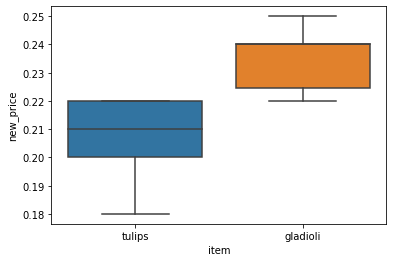

In [52]:
sns.boxplot( data=df_t.loc[ (df_t['category'] == 'cut_flowers') & (df_t['year'] == 2020) , : ]  , x="item" , y="new_price" )

<AxesSubplot:xlabel='item', ylabel='price'>

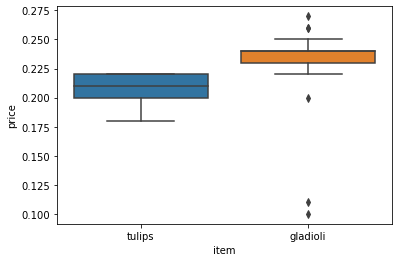

In [53]:
sns.boxplot( data=df.loc[ (df['category'] == 'cut_flowers') & (df['year'] == 2020) , : ]  , x="item" , y="price" )

<AxesSubplot:xlabel='item', ylabel='new_price'>

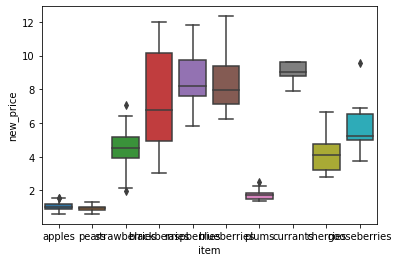

In [55]:
sns.boxplot( data=df_t.loc[ (df_t['category'] == 'fruit') & (df_t['year'] == 2020) , : ]  , x="item" , y="new_price" )

<AxesSubplot:xlabel='item', ylabel='new_price'>

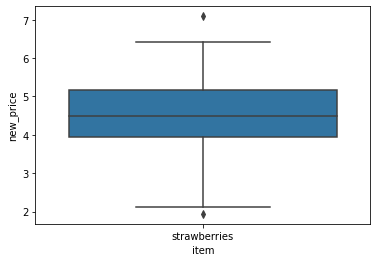

In [56]:
sns.boxplot( data=df_t.loc[ (df_t['category'] == 'fruit') & (df_t['item'] == 'strawberries') & (df_t['year'] == 2020) , : ]  , x="item" , y="new_price" )